In [3]:
#Importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Read the Data here
df = pd.read_csv('heart_disease.csv')
df.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              303 non-null    float64
 1   gender           303 non-null    float64
 2   cp               303 non-null    float64
 3   trestbps         303 non-null    float64
 4   chol             303 non-null    float64
 5   fbs              303 non-null    float64
 6   restecg          303 non-null    float64
 7   thalach          303 non-null    float64
 8   exang            303 non-null    float64
 9   oldpeak          303 non-null    float64
 10  slope            303 non-null    float64
 11  ca               299 non-null    float64
 12  thal             301 non-null    float64
 13  heart_diagnosis  303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [6]:
#statistical summary of the dataset
df.describe()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_diagnosis
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [7]:
df.isna().sum()

age                0
gender             0
cp                 0
trestbps           0
chol               0
fbs                0
restecg            0
thalach            0
exang              0
oldpeak            0
slope              0
ca                 4
thal               2
heart_diagnosis    0
dtype: int64

In [8]:
from sklearn.impute import SimpleImputer
ca_imputer= SimpleImputer(strategy="median")
df["ca"] = ca_imputer.fit_transform(df[["ca"]])

th_imputer= SimpleImputer(strategy="most_frequent")
df["thal"] = th_imputer.fit_transform(df[["thal"]])
print(df.isnull().sum())   
# df = df.dropna()
df.shape

age                0
gender             0
cp                 0
trestbps           0
chol               0
fbs                0
restecg            0
thalach            0
exang              0
oldpeak            0
slope              0
ca                 0
thal               0
heart_diagnosis    0
dtype: int64


(303, 14)

In [9]:
# excluding "oldpeak column"
columns_to_convert = df.columns[df.columns != 'oldpeak']
# convert float columns to integer
df[columns_to_convert] = df[columns_to_convert].astype(int)
df.dtypes

age                  int32
gender               int32
cp                   int32
trestbps             int32
chol                 int32
fbs                  int32
restecg              int32
thalach              int32
exang                int32
oldpeak            float64
slope                int32
ca                   int32
thal                 int32
heart_diagnosis      int32
dtype: object

In [10]:
df.shape

(303, 14)

In [11]:
df.columns

Index(['age', 'gender', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'heart_diagnosis'],
      dtype='object')

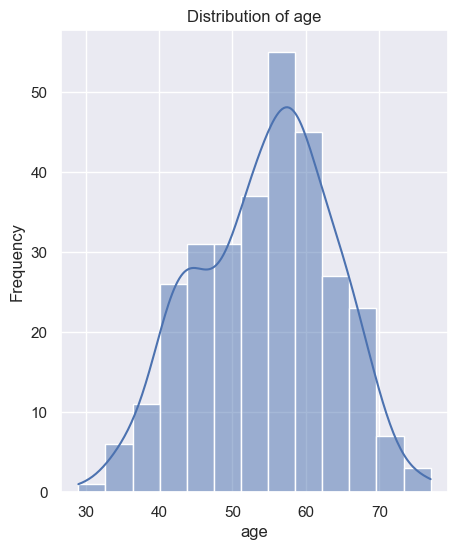

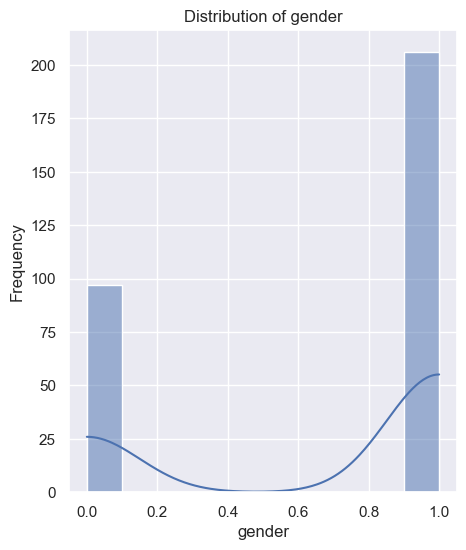

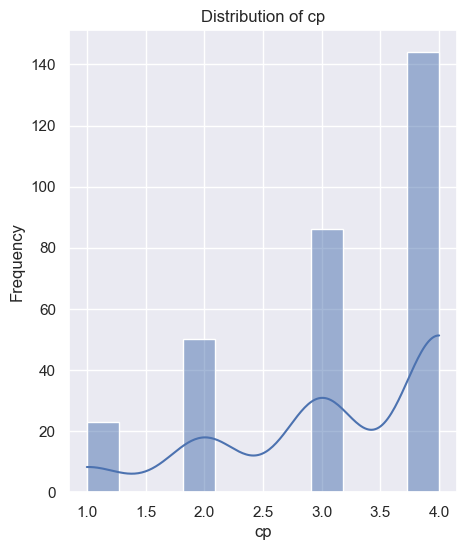

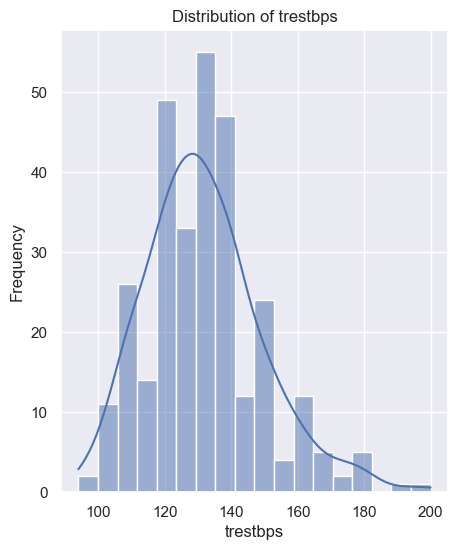

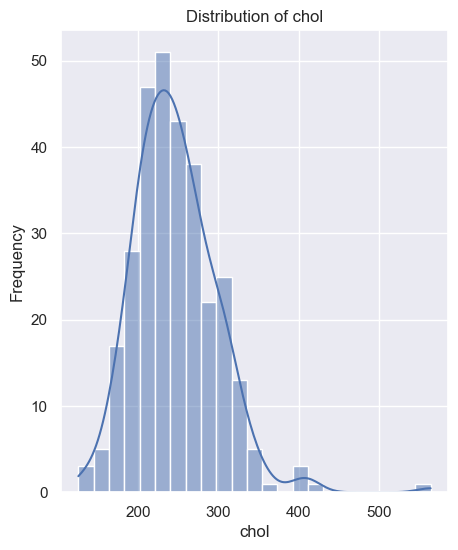

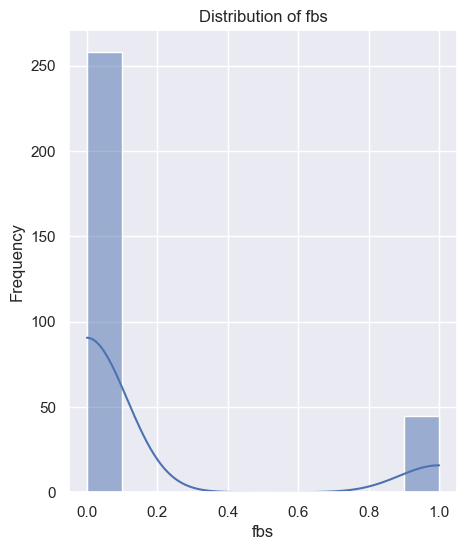

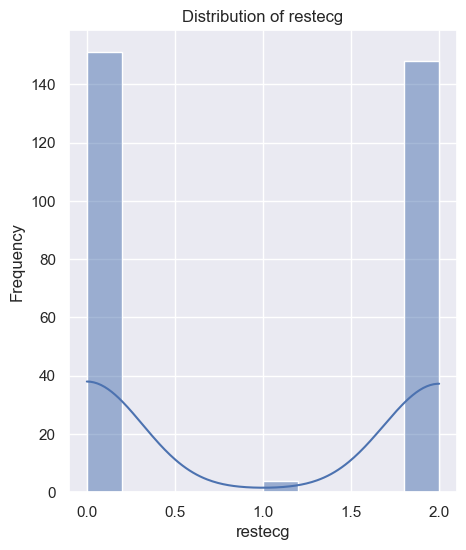

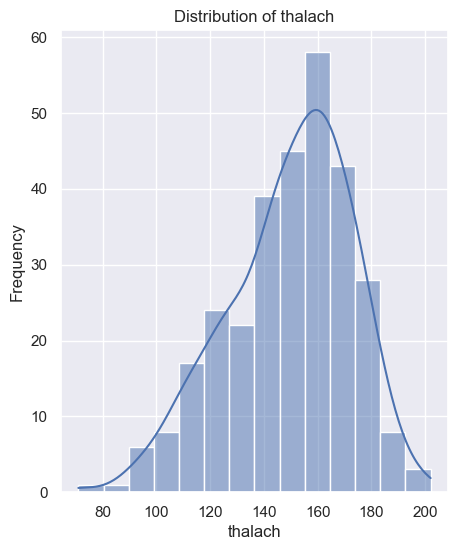

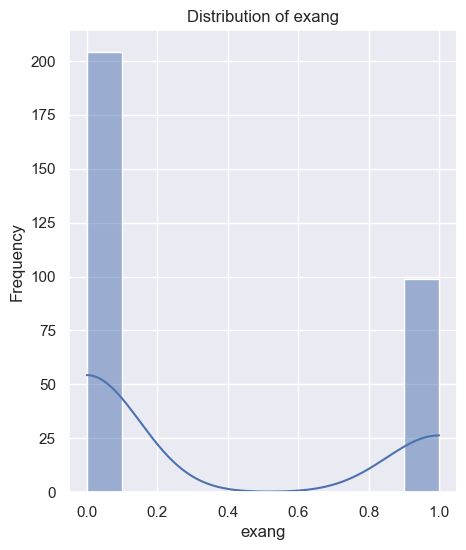

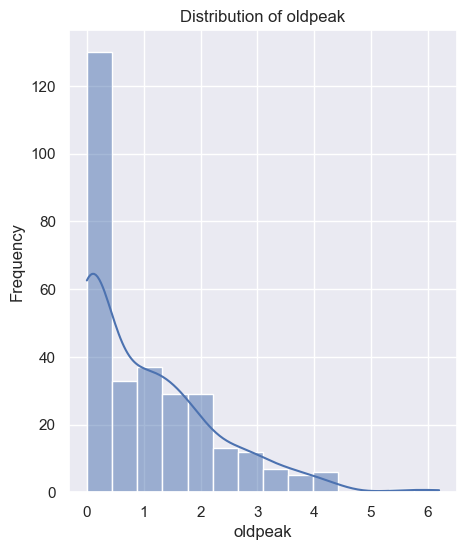

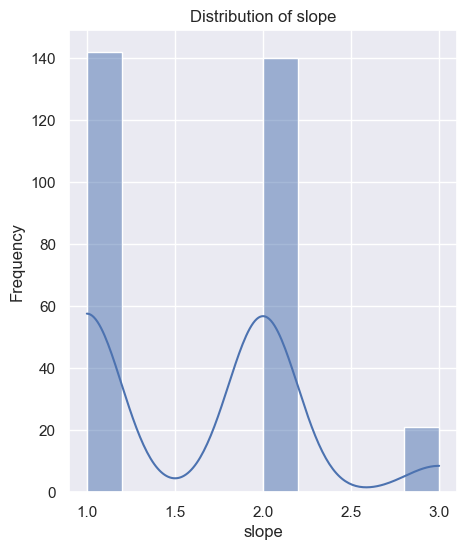

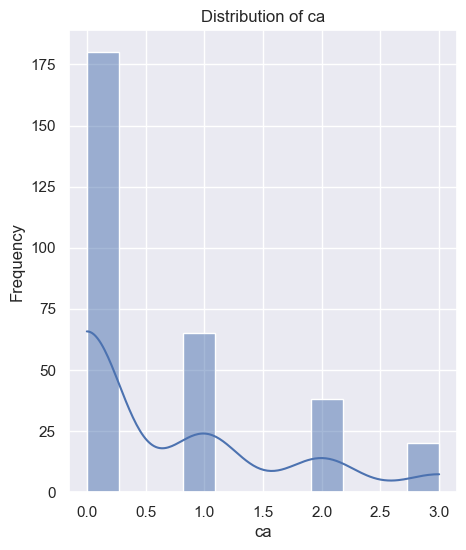

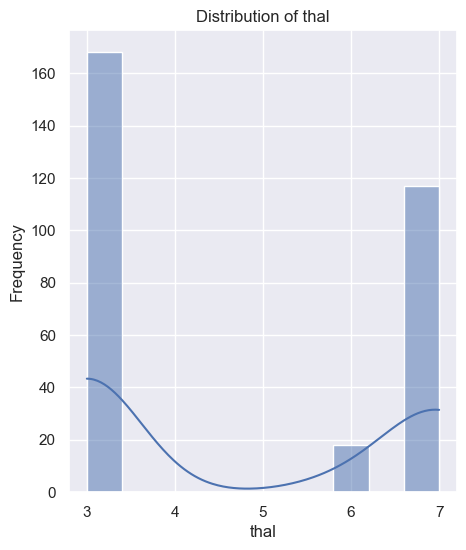

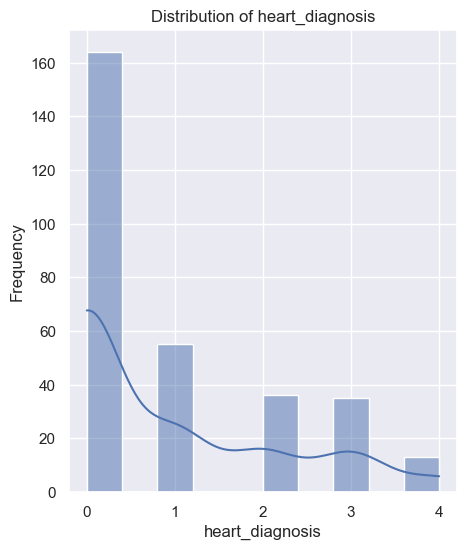

In [12]:
sns.set()

# Function to plot the distribution of a column with a defined figure size
def distplots(col, width=10, height=6):
    plt.figure(figsize=(width, height))
    sns.histplot(df[col], kde=True)  # `sns.distplot` is deprecated, using `sns.histplot` with `kde=True` instead
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Iterate through the columns and plot distributions
for col in df.columns:
    distplots(col, width=5, height=6)

In [13]:
!pip install opencv-python

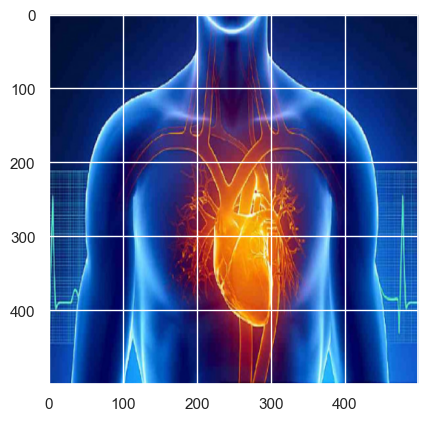

In [14]:
import cv2 
import matplotlib.pyplot as plt
im=cv2.imread('heart_disease.jpg')
im_resized=cv2.resize(im,(500,500),interpolation=cv2.INTER_LINEAR)
plt.imshow(cv2.cvtColor(im_resized,cv2.COLOR_BGR2RGB))
plt.show()


In [15]:
temp=df["heart_diagnosis"].value_counts()


Axes(0.125,0.11;0.775x0.77)


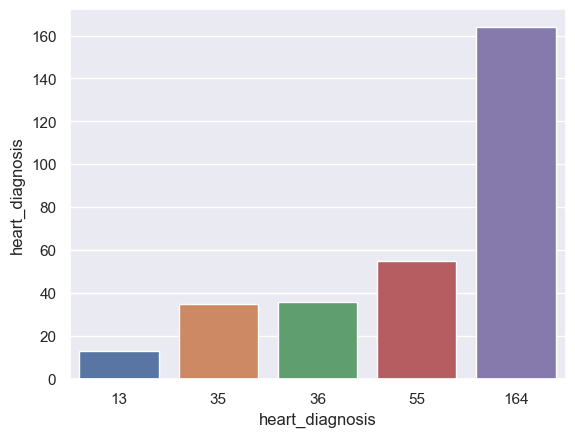

In [16]:
#plot a barchart showing the comparison between people suffering from herat disease and people not suffering from heart disease
temp_df = pd.DataFrame({
    'heart_diagnosis': temp.index,
    'heart_diagnosis': temp.values
})
print(sns.barplot(x='heart_diagnosis',y="heart_diagnosis",data=temp_df))

In [17]:
df_dup=df.duplicated().any()
print (df_dup)

False


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'heart_diagnosis'}>, <Axes: >, <Axes: >]],
      dtype=object)

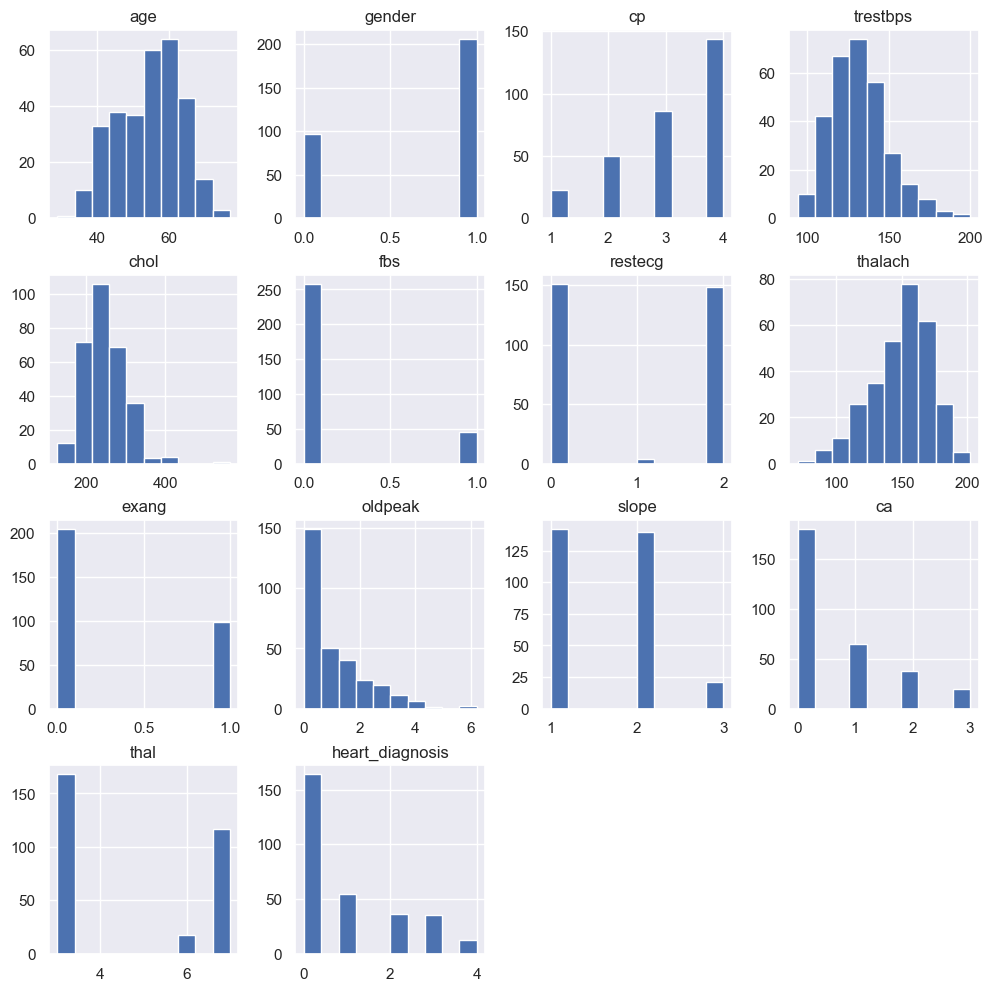

In [18]:
# Treat missing values - for simplicity, we'll fill with the median of each column
df.fillna(df.median(), inplace=True)
df.hist(figsize=(12,12))

<function matplotlib.pyplot.show(close=None, block=None)>

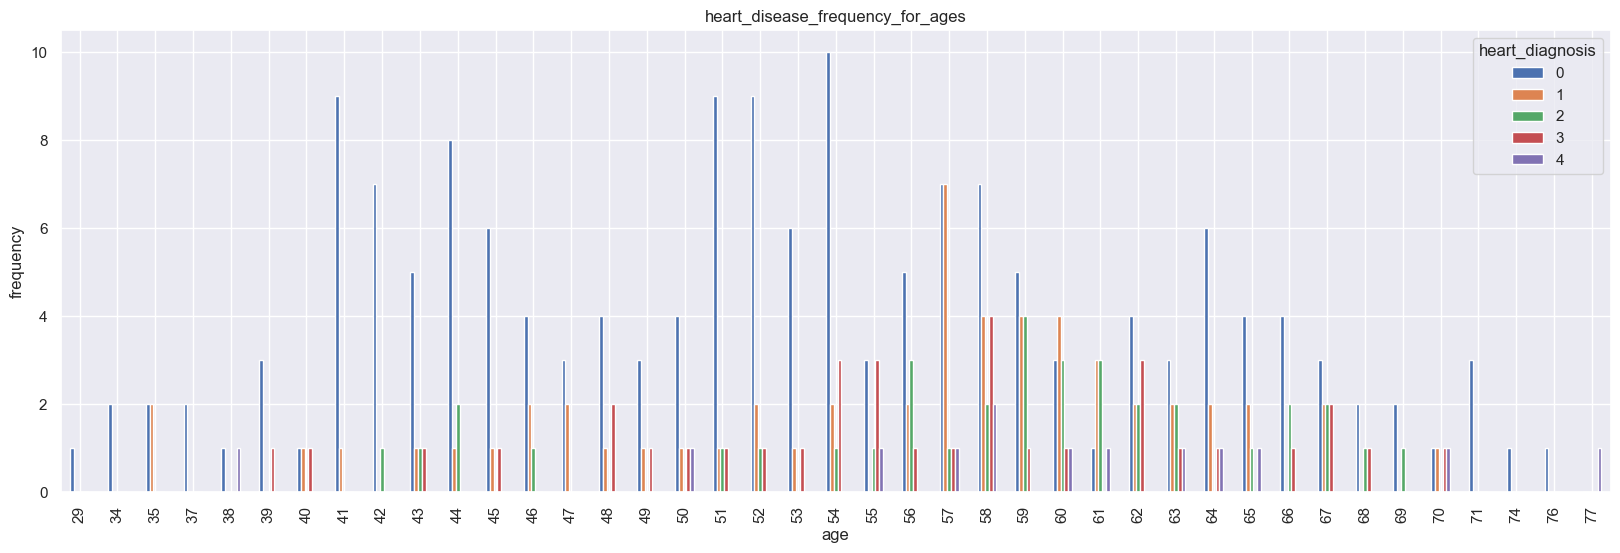

In [19]:
pd.crosstab(df.age,df.heart_diagnosis).plot(kind="bar",figsize=(20,6))
plt.title('heart_disease_frequency_for_ages')
plt.xlabel('age')
plt.ylabel('frequency')
plt.savefig('heartdiseaseandages.png')
plt.show


In [20]:
# Check for class distribution
print(df['heart_diagnosis'].value_counts())

heart_diagnosis
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64


Text(0.5, 1.0, 'Correlation_Matrix')

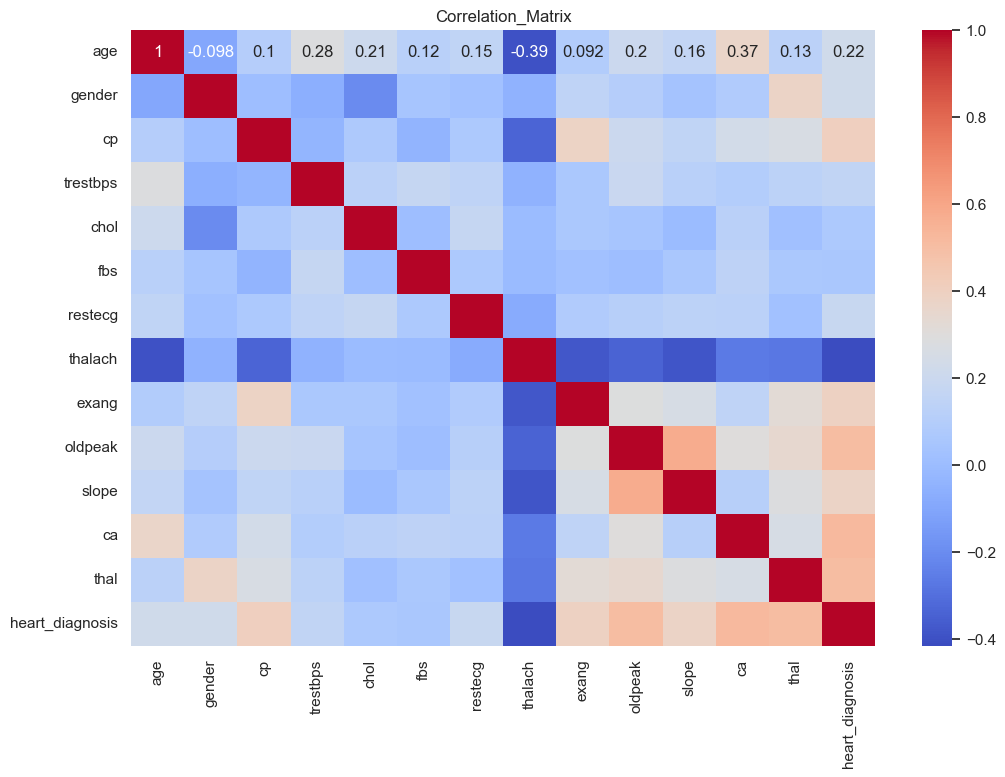

In [21]:
#correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True,cmap='coolwarm')
plt.title('Correlation_Matrix')


In [22]:
#transform the categorical data
df= pd.get_dummies(df,columns=['cp', 'restecg','slope','thal'],drop_first=True)


In [23]:
df.columns

Index(['age', 'gender', 'trestbps', 'chol', 'fbs', 'thalach', 'exang',
       'oldpeak', 'ca', 'heart_diagnosis', 'cp_2', 'cp_3', 'cp_4', 'restecg_1',
       'restecg_2', 'slope_2', 'slope_3', 'thal_6', 'thal_7'],
      dtype='object')

In [24]:
# Split the dataset into features and target variable
X = df.drop('heart_diagnosis', axis=1)
y = df['heart_diagnosis']


In [25]:
from sklearn.model_selection import train_test_split


In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
X_train

,age,gender,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_2,cp_3,cp_4,restecg_1,restecg_2,slope_2,slope_3,thal_6,thal_7
132,29,1,130,204,0,202,0,0.0,0,True,False,False,False,True,False,False,False,False
202,57,1,150,126,1,173,0,0.2,1,False,True,False,False,False,False,False,False,True
196,69,1,160,234,1,131,0,0.1,1,False,False,False,False,True,True,False,False,False
75,65,0,160,360,0,151,0,0.8,0,False,True,False,False,True,False,False,False,False
176,52,1,108,233,1,147,0,0.1,3,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,54,1,192,283,0,195,0,0.0,1,True,False,False,False,True,False,False,False,True
71,67,1,125,254,1,163,0,0.2,2,False,False,True,False,False,True,False,False,True
106,59,1,140,177,0,162,1,0.0,1,False,False,True,False,False,False,False,False,True
270,61,1,140,207,0,138,1,1.9,1,False,False,True,False,True,False,False,False,True


In [28]:
y_test

179    0
228    3
111    1
246    2
60     2
      ..
249    0
104    3
300    3
193    2
184    1
Name: heart_diagnosis, Length: 61, dtype: int32

In [29]:
#logistic regression
df.head

<bound method NDFrame.head of      age  gender  trestbps  chol  fbs  thalach  exang  oldpeak  ca  \
0     63       1       145   233    1      150      0      2.3   0   
1     67       1       160   286    0      108      1      1.5   3   
2     67       1       120   229    0      129      1      2.6   2   
3     37       1       130   250    0      187      0      3.5   0   
4     41       0       130   204    0      172      0      1.4   0   
..   ...     ...       ...   ...  ...      ...    ...      ...  ..   
298   45       1       110   264    0      132      0      1.2   0   
299   68       1       144   193    1      141      0      3.4   2   
300   57       1       130   131    0      115      1      1.2   1   
301   57       0       130   236    0      174      0      0.0   1   
302   38       1       138   175    0      173      0      0.0   0   

     heart_diagnosis   cp_2   cp_3   cp_4  restecg_1  restecg_2  slope_2  \
0                  0  False  False  False      False 

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
log=LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [32]:
# Make predictions
y_pred1 = log.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(y_test,y_pred1)

0.5081967213114754

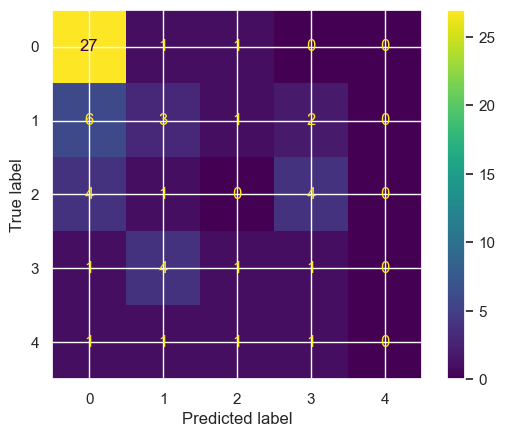

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
Confusionmatrix = confusion_matrix(y_test, y_pred1)
disp = ConfusionMatrixDisplay(confusion_matrix=Confusionmatrix, display_labels=log.classes_)
disp.plot()

In [36]:
#print the model results
y_pred=log.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Confusionmatrix:\n",confusion_matrix(y_test,y_pred))
print("Classification_report:\n",classification_report(y_test,y_pred))
      

Accuracy: 0.5081967213114754
Confusionmatrix:
 [[27  1  1  0  0]
 [ 6  3  1  2  0]
 [ 4  1  0  4  0]
 [ 1  4  1  1  0]
 [ 1  1  1  1  0]]
Classification_report:
               precision    recall  f1-score   support

           0       0.69      0.93      0.79        29
           1       0.30      0.25      0.27        12
           2       0.00      0.00      0.00         9
           3       0.12      0.14      0.13         7
           4       0.00      0.00      0.00         4

    accuracy                           0.51        61
   macro avg       0.22      0.26      0.24        61
weighted avg       0.40      0.51      0.45        61



In [37]:
#fit the pipeline
log.fit(X_train,y_train)

#Access the logistic regression model from the pipeline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
logReg= make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000,solver='lbfgs'))

In [38]:
logReg.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

{'standardscaler': StandardScaler(), 'logisticregression': LogisticRegression(max_iter=1000)}


<function matplotlib.pyplot.show(close=None, block=None)>

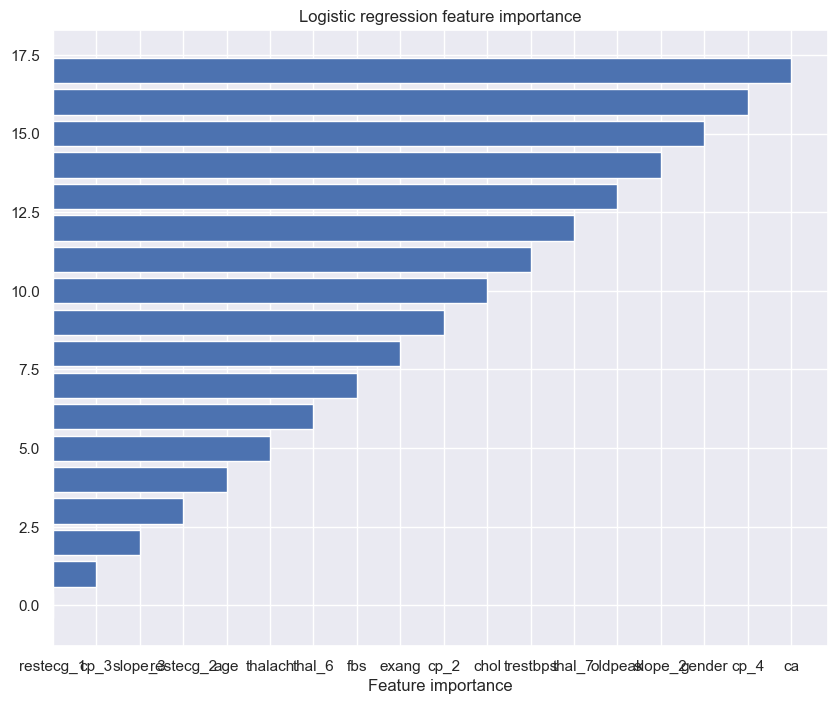

In [39]:

log_reg_model=logReg.named_steps['logisticregression']
print(logReg.named_steps)

#get feature importance from the logistic regression model
feature_importance=np.abs(log_reg_model.coef_[0])
feature_names=X_train.columns
sorted_idx=np.argsort(feature_importance)

#visualise feature importance
plt.figure(figsize=(10,8))
plt.barh(range(len(sorted_idx)),[feature_names[i] for i in sorted_idx])
plt.xlabel('Feature importance')
plt.title('Logistic regression feature importance')
plt.show


In [40]:
#SVC
from sklearn import svm

In [41]:
svm = svm.SVC()
svm.fit(X_train,y_train)

SVC()

In [42]:
y_pred2=svm.predict(X_test)

In [43]:
accuracy_score(y_test,y_pred2)

0.47540983606557374

In [44]:
#KNieghbors classifier
from sklearn.neighbors import KNeighborsClassifier

In [45]:
knn= KNeighborsClassifier()

In [46]:
knn.fit(X_train,y_train)


KNeighborsClassifier()

In [47]:
y_pred3=knn.predict(X_test)

In [48]:
accuracy_score(y_test,y_pred3)

0.4426229508196721

In [49]:
#gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

In [50]:
gbc=GradientBoostingClassifier()

In [51]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [52]:
y_pred4=gbc.predict(X_test)

In [53]:
accuracy_score(y_test,y_pred4)

0.45901639344262296

In [54]:
final_data = pd.DataFrame({
    'Models': ['LR', 'svm', 'knn', 'gbc'],
    'Accuracy': [accuracy_score(y_test, y_pred1), 
            accuracy_score(y_test, y_pred2), 
            accuracy_score(y_test, y_pred3), 
            accuracy_score(y_test, y_pred4)]
})

In [55]:
# Print feature importance
print("Feature Importance:\n", final_data)



Feature Importance:
   Models  Accuracy
0     LR  0.508197
1    svm  0.475410
2    knn  0.442623
3    gbc  0.459016


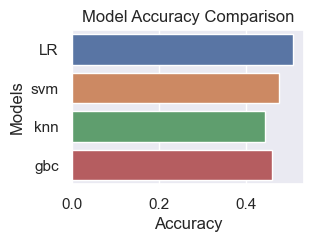

In [58]:
# Plot model accuracy comparison
plt.figure(figsize=(3,2))
sns.barplot(x='Accuracy', y='Models', data=final_data)
plt.title("Model Accuracy Comparison")
plt.show()


In [60]:
#Feature importance 
importances = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(log.coef_[0])})
importances = importances.sort_values('Importance', ascending=False)
print('Feature Importances:\n', importances)

Feature Importances:
       Feature  Importance
8          ca    0.556690
7     oldpeak    0.541114
17     thal_7    0.315073
11       cp_4    0.300801
1      gender    0.245338
6       exang    0.223851
14    slope_2    0.200645
10       cp_3    0.186634
9        cp_2    0.077521
13  restecg_2    0.074448
5     thalach    0.025974
15    slope_3    0.010930
0         age    0.010569
2    trestbps    0.005582
4         fbs    0.005574
12  restecg_1    0.004848
3        chol    0.003122
16     thal_6    0.000483
